# Import the Most Used Libraries

In [1318]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15, 12)})


# Read the Data and Display Statistical Infomation

In [1409]:
df = pd.read_csv('Cars.csv')   # Read the Data from CSV File

In [1266]:
df.head()

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


In [1225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14741 non-null  int64  
 1   Brand         14741 non-null  object 
 2   Model         14741 non-null  object 
 3   Body          14741 non-null  object 
 4   Color         14741 non-null  object 
 5   Year          14741 non-null  int64  
 6   Fuel          14741 non-null  object 
 7   Kilometers    14741 non-null  object 
 8   Engine        14741 non-null  object 
 9   Transmission  14741 non-null  object 
 10  Price         14741 non-null  float64
 11  Gov           14741 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


In [1226]:
df.describe()

,Unnamed: 0,Year,Price
count,14741.000000,14741.000000,14741.000000
mean,8934.846754,2005.456821,116.584987
std,4922.065495,12.655566,82.192718
min,812.000000,1970.000000,3.000000
25%,4497.000000,1998.000000,43.700000
50%,8182.000000,2010.000000,110.000000
75%,13373.000000,2015.000000,161.000000
max,17058.000000,2022.000000,471.500000


# Data Processing Techniques : 

- Unnamed: 0 (Removed).
- Kilometers (Take Median of range and Converted to float). 
- Engine (Take Maximum range and Converted to float).
- Price Converted to Thousands.
- Feature Engineering and Extraction: From Price (Egy) to Price (Dollar), Age of Car Extracted from year. 
- Remove Duplications.
- Detect Outliers and delete Them


## Delete "Unnamed: 0" Column 

In [1413]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Get kilometers

In [1414]:
def Get_kilometers(Num):
  
  if Num == "More than 200000":
    Kilo = Num.split(" ")[2]                                 # Handling the Text 'More than 200000' by exchange it to integer 2000000

  else : 
    Kilo = Num.split(sep="to")[0]
    Kilo = Kilo.strip()                                      # Handling '140000 to 159999' by Spliting them and Choose the Median

    if len(Kilo) <= 5 :
      Kilo = ( int(Kilo) + ( int(Kilo) + 10000 ))/2          # the Pattern was noticed is that if data below 100000 kilometers the range is 10000 more and Vice versa                                                      

    elif len(Kilo) >= 6 :
      Kilo = ( int(Kilo) + ( int(Kilo) + 20000 ))/2             

  return Kilo 
   

In [1415]:
df['Kilometers'] = df.Kilometers.apply(Get_kilometers)
df['Kilometers'] = df['Kilometers'].astype(int)                 # Convert the Column to integer
df

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,150000,1600 CC,Automatic,140.0,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,190000,1000 - 1300 CC,Manual,78.0,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,150000,1400 - 1500 CC,Manual,70.0,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,150000,1600 CC,Automatic,150.0,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,15000,1000 - 1300 CC,Manual,75.0,Giza
...,...,...,...,...,...,...,...,...,...,...,...
14736,Fiat,Uno,Hatchback,Burgundy,1997,Benzine,170000,1000 - 1300 CC,Manual,46.0,Cairo
14737,Fiat,Uno,Hatchback,Silver,1996,Benzine,25000,1000 - 1300 CC,Manual,46.0,Alexandria
14738,Fiat,Uno,Hatchback,Burgundy,1993,Benzine,15000,1000 - 1300 CC,Manual,43.7,Giza
14739,Fiat,Uno,Hatchback,Silver,1996,Benzine,15000,1000 - 1300 CC,Manual,69.0,Cairo


## Get Engine

In [1416]:
def Get_Engine(Num):

   if (len(Num) > 7) :                             # Spliting The data whose Length is more than 7 by spliting the range and remove 'CC' an Take Maximum

      Eng = Num.split(sep="-")[1]
      Eng = Eng.strip('CC')
      Eng = int(Eng)
   
   else:                                           # Spliting The data whose Length is less than 7 by remove 'CC' an Take Maximum 
      Eng = Num.strip('CC')
      Eng = int(Eng)

   return Eng

In [1417]:
df['Engine'] = df.Engine.apply(Get_Engine)
df

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,150000,1600,Automatic,140.0,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,190000,1300,Manual,78.0,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,150000,1500,Manual,70.0,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,150000,1600,Automatic,150.0,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,15000,1300,Manual,75.0,Giza
...,...,...,...,...,...,...,...,...,...,...,...
14736,Fiat,Uno,Hatchback,Burgundy,1997,Benzine,170000,1300,Manual,46.0,Cairo
14737,Fiat,Uno,Hatchback,Silver,1996,Benzine,25000,1300,Manual,46.0,Alexandria
14738,Fiat,Uno,Hatchback,Burgundy,1993,Benzine,15000,1300,Manual,43.7,Giza
14739,Fiat,Uno,Hatchback,Silver,1996,Benzine,15000,1300,Manual,69.0,Cairo


## Converting Price to Thousands

In [1418]:
df.Price = df.Price.apply(lambda x : x * 1000 )           # Function to Multiply each Value by 1000 
df

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,150000,1600,Automatic,140000.0,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,190000,1300,Manual,78000.0,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,150000,1500,Manual,70000.0,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,150000,1600,Automatic,150000.0,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,15000,1300,Manual,75000.0,Giza
...,...,...,...,...,...,...,...,...,...,...,...
14736,Fiat,Uno,Hatchback,Burgundy,1997,Benzine,170000,1300,Manual,46000.0,Cairo
14737,Fiat,Uno,Hatchback,Silver,1996,Benzine,25000,1300,Manual,46000.0,Alexandria
14738,Fiat,Uno,Hatchback,Burgundy,1993,Benzine,15000,1300,Manual,43700.0,Giza
14739,Fiat,Uno,Hatchback,Silver,1996,Benzine,15000,1300,Manual,69000.0,Cairo


## Featue Engineering and Extraction 

### From Price (Egy) to Price (Dollar)

In [1419]:
df['Price($)'] = df.Price.apply(lambda x : x * 0.041 )      #Function by Multiplying Each Value by (0.041) ' the exchange rate for Nov 2022'  

In [1420]:
df.drop('Price', axis=1, inplace=True)
df

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Gov,Price($)
0,Hyundai,Accent,Sedan,Black,2007,Benzine,150000,1600,Automatic,Giza,5740.0
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,190000,1300,Manual,Qena,3198.0
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,150000,1500,Manual,Giza,2870.0
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,150000,1600,Automatic,Cairo,6150.0
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,15000,1300,Manual,Giza,3075.0
...,...,...,...,...,...,...,...,...,...,...,...
14736,Fiat,Uno,Hatchback,Burgundy,1997,Benzine,170000,1300,Manual,Cairo,1886.0
14737,Fiat,Uno,Hatchback,Silver,1996,Benzine,25000,1300,Manual,Alexandria,1886.0
14738,Fiat,Uno,Hatchback,Burgundy,1993,Benzine,15000,1300,Manual,Giza,1791.7
14739,Fiat,Uno,Hatchback,Silver,1996,Benzine,15000,1300,Manual,Cairo,2829.0


### Age of car Extracted from Year 

In [1421]:
df['Age_of_Car'] = df.Year.apply(lambda x : "Old" if x < 2010 else "New" )      # Function to chane data to Old or New According to its Year of Manufutering
df

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Gov,Price($),Age_of_Car
0,Hyundai,Accent,Sedan,Black,2007,Benzine,150000,1600,Automatic,Giza,5740.0,Old
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,190000,1300,Manual,Qena,3198.0,Old
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,150000,1500,Manual,Giza,2870.0,Old
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,150000,1600,Automatic,Cairo,6150.0,Old
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,15000,1300,Manual,Giza,3075.0,Old
...,...,...,...,...,...,...,...,...,...,...,...,...
14736,Fiat,Uno,Hatchback,Burgundy,1997,Benzine,170000,1300,Manual,Cairo,1886.0,Old
14737,Fiat,Uno,Hatchback,Silver,1996,Benzine,25000,1300,Manual,Alexandria,1886.0,Old
14738,Fiat,Uno,Hatchback,Burgundy,1993,Benzine,15000,1300,Manual,Giza,1791.7,Old
14739,Fiat,Uno,Hatchback,Silver,1996,Benzine,15000,1300,Manual,Cairo,2829.0,Old


## Remove Duplications

In [1422]:
df[df.duplicated() == True]     #Select which of the Rows is Fully Duplicated in All Features

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Gov,Price($),Age_of_Car
12937,Fiat,128,Sedan,Red,1984,Benzine,95000,1300,Manual,Giza,779.0,Old


In [1423]:
df.drop(labels=[12937],axis=0,inplace=True)      # Deleting the Duplicated Row
df

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Gov,Price($),Age_of_Car
0,Hyundai,Accent,Sedan,Black,2007,Benzine,150000,1600,Automatic,Giza,5740.0,Old
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,190000,1300,Manual,Qena,3198.0,Old
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,150000,1500,Manual,Giza,2870.0,Old
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,150000,1600,Automatic,Cairo,6150.0,Old
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,15000,1300,Manual,Giza,3075.0,Old
...,...,...,...,...,...,...,...,...,...,...,...,...
14736,Fiat,Uno,Hatchback,Burgundy,1997,Benzine,170000,1300,Manual,Cairo,1886.0,Old
14737,Fiat,Uno,Hatchback,Silver,1996,Benzine,25000,1300,Manual,Alexandria,1886.0,Old
14738,Fiat,Uno,Hatchback,Burgundy,1993,Benzine,15000,1300,Manual,Giza,1791.7,Old
14739,Fiat,Uno,Hatchback,Silver,1996,Benzine,15000,1300,Manual,Cairo,2829.0,Old


## Detect Outliers and Delete them

In [1380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14740 entries, 0 to 14740
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         14740 non-null  object 
 1   Model         14740 non-null  object 
 2   Body          14740 non-null  object 
 3   Color         14740 non-null  object 
 4   Year          14740 non-null  int64  
 5   Fuel          14740 non-null  object 
 6   Kilometers    14740 non-null  float64
 7   Engine        14740 non-null  int64  
 8   Transmission  14740 non-null  object 
 9   Gov           14740 non-null  object 
 10  Price($)      14740 non-null  float64
 11  Age_of_Car    14740 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.5+ MB


<AxesSubplot:xlabel='Price($)'>

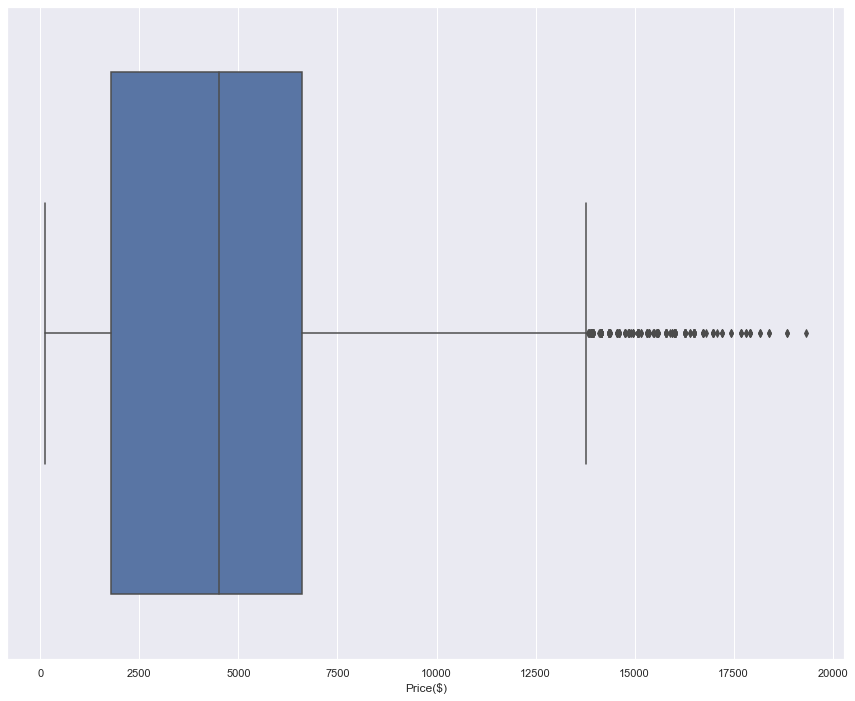

In [1381]:
sns.boxplot(data=df,x='Price($)')   #howing the Data is above the Boundary of Q1 + (1.5*IQR)

In [1424]:
df.drop(labels=df[df['Price($)'] >= 12500].index,axis=0,inplace=True)     #Remove All the Values Above the Wiskers
df

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Gov,Price($),Age_of_Car
0,Hyundai,Accent,Sedan,Black,2007,Benzine,150000,1600,Automatic,Giza,5740.0,Old
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,190000,1300,Manual,Qena,3198.0,Old
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,150000,1500,Manual,Giza,2870.0,Old
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,150000,1600,Automatic,Cairo,6150.0,Old
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,15000,1300,Manual,Giza,3075.0,Old
...,...,...,...,...,...,...,...,...,...,...,...,...
14736,Fiat,Uno,Hatchback,Burgundy,1997,Benzine,170000,1300,Manual,Cairo,1886.0,Old
14737,Fiat,Uno,Hatchback,Silver,1996,Benzine,25000,1300,Manual,Alexandria,1886.0,Old
14738,Fiat,Uno,Hatchback,Burgundy,1993,Benzine,15000,1300,Manual,Giza,1791.7,Old
14739,Fiat,Uno,Hatchback,Silver,1996,Benzine,15000,1300,Manual,Cairo,2829.0,Old


## Correlation Analysis

In [1281]:
df.corr()

,Year,Kilometers,Engine,Price($)
Year,1.000000,-0.209191,0.619260,0.801834
Kilometers,-0.209191,1.000000,-0.203954,-0.173020
Engine,0.619260,-0.203954,1.000000,0.620195
Price($),0.801834,-0.173020,0.620195,1.000000


# Asking Questions & Graphing (Exploratory Data Analysis)

### 1-The Most Priced Car Grouped by Year ?

In [985]:
df.groupby('Year').sum().sort_values(by='Price($)',ascending=False)[['Price($)']]   


,Price($)
Year,
2017,4984013.3
2015,4867634.8
2013,4699100.2
2019,4213721.7
2018,4169220.3
2012,3943199.6
2016,3793504.5
2011,3758720.1
2010,3758092.8


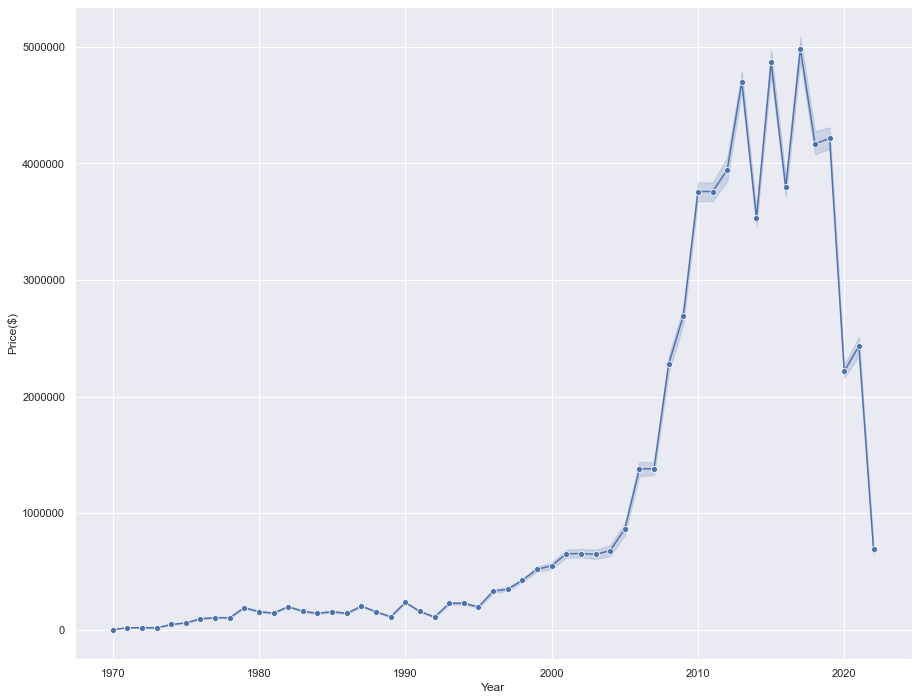

In [1042]:

sns.lineplot(data=df,x='Year',y='Price($)',estimator=sum,marker='o')
plt.ticklabel_format(style='plain', axis='y')


### 2-The Most Priced Car Fuel Used ?

In [1002]:

df.groupby('Fuel').sum().sort_values(by='Price($)',ascending=False)[['Price($)']]


,Price($)
Fuel,
Benzine,61341432.5
Natural Gas,2466633.8


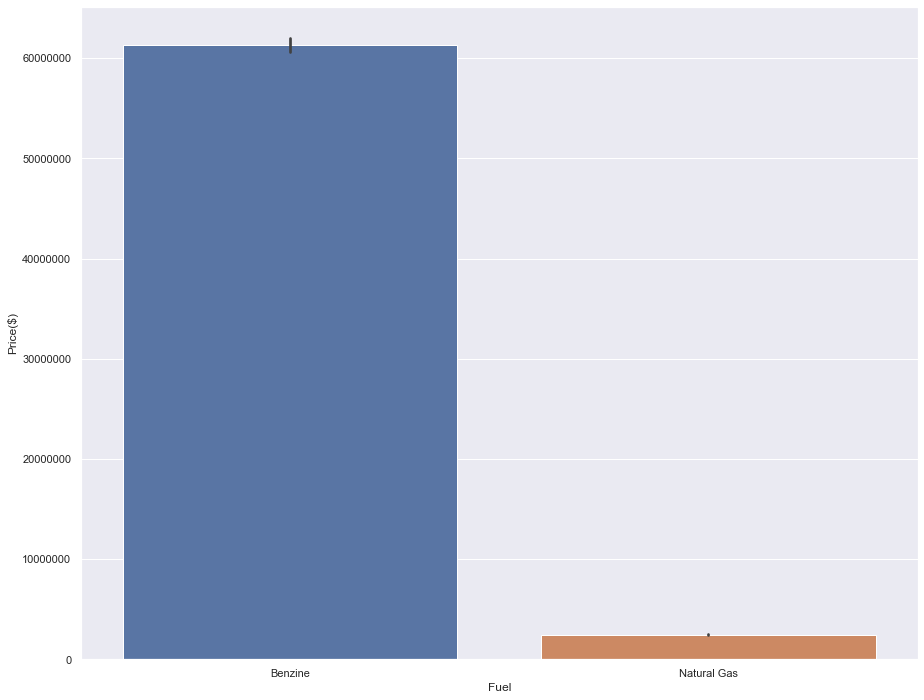

In [1003]:
sns.barplot(data=df,x='Fuel',y='Price($)',estimator=sum,)
plt.ticklabel_format(style='plain', axis='y')

### 3-The Most Used Transmission ?

In [840]:
df.groupby('Transmission').sum().sort_values(by='Price($)',ascending=False)[['Price($)']]

,Price($)
Transmission,
Automatic,33476213.0
Manual,30332632.3


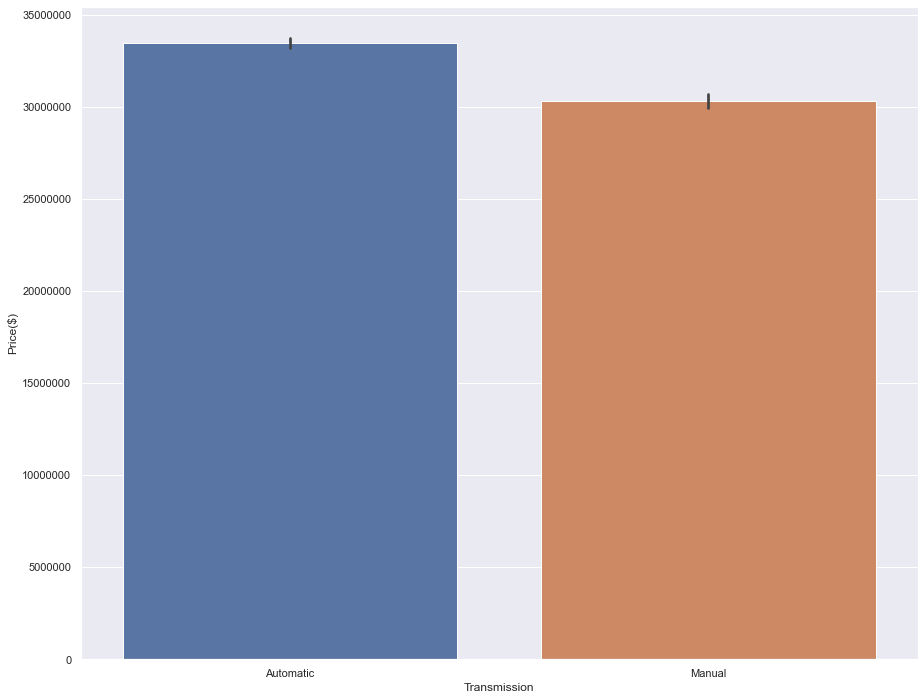

In [1333]:
sns.barplot(data=df,x='Transmission',y='Price($)',estimator=sum)
plt.ticklabel_format(style='plain', axis='y')

### 4-The Most Priced Car Color ?

In [208]:

df.groupby('Color').sum().sort_values(by='Price($)',ascending=False)[['Price($)']]

,Price($)
Color,
Black,7015243.5
Silver,6958044.4
Gray,5883741.9
White,4545674.1
Blue- Navy Blue,3977459.2
Other Color,3814627.7
Burgundy,3460494.3
Red,3321795.4
Gold,1421511.0


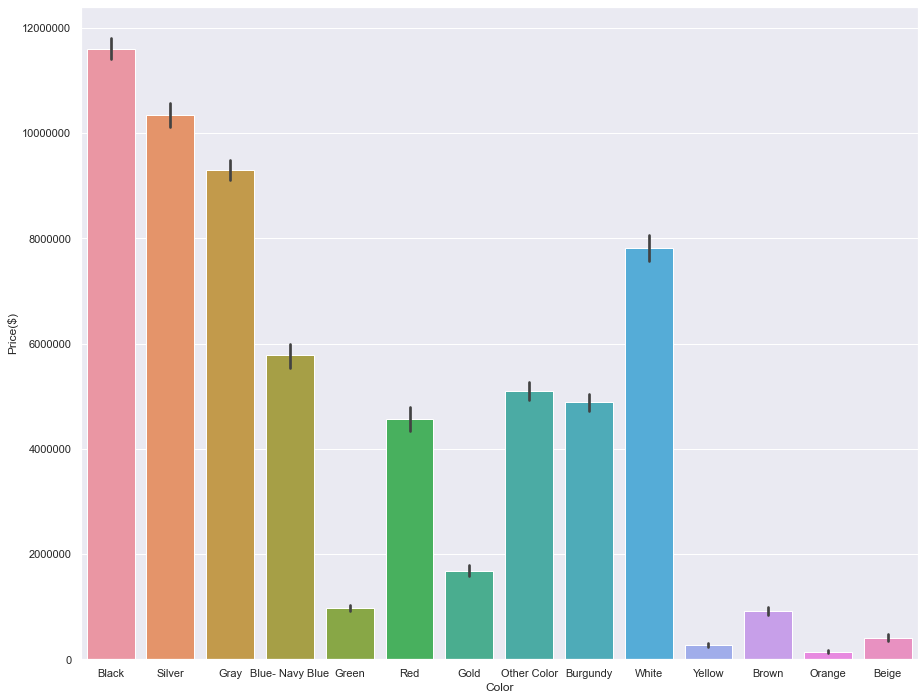

In [1004]:
sns.barplot(data=df,x='Color',y='Price($)',estimator=sum)
plt.ticklabel_format(style='plain', axis='y')


### 5-The Most Priced Car by Brand ?

In [209]:

df.groupby('Brand').sum().sort_values(by='Price($)',ascending=False)[['Price($)']]

,Price($)
Brand,
Hyundai,22729051.1
Chevrolet,14705461.8
Fiat,5461995.4


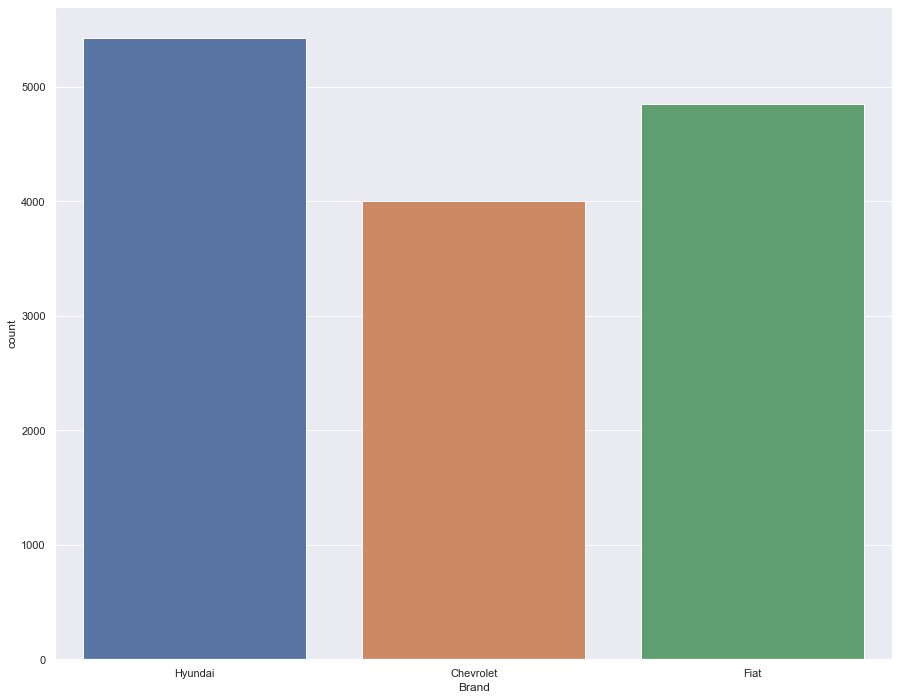

In [1211]:
sns.countplot(data=df,x='Brand')
plt.ticklabel_format(style='plain', axis='y')

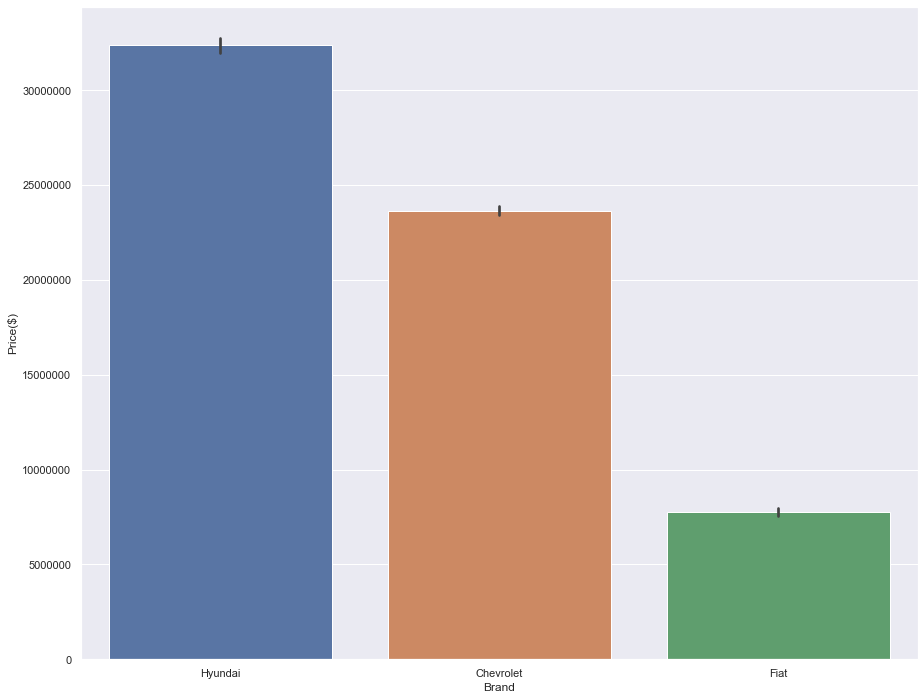

In [1005]:
sns.barplot(data=df,x='Brand',y='Price($)',estimator=sum)
plt.ticklabel_format(style='plain', axis='y')

### 6-The Most Priced Car Grouped by Model ?

In [210]:


df.groupby('Model').sum().sort_values(by='Price($)',ascending=False)[['Price($)']]


,Price($)
Model,
Elantra,6974370.6
Verna,5983253.0
Optra,5190899.3
Accent,4850246.7
Lanos,3857333.3
Aveo,3642673.7
Cruze,2014555.5
Matrix,1672824.6
Avante,1660737.8


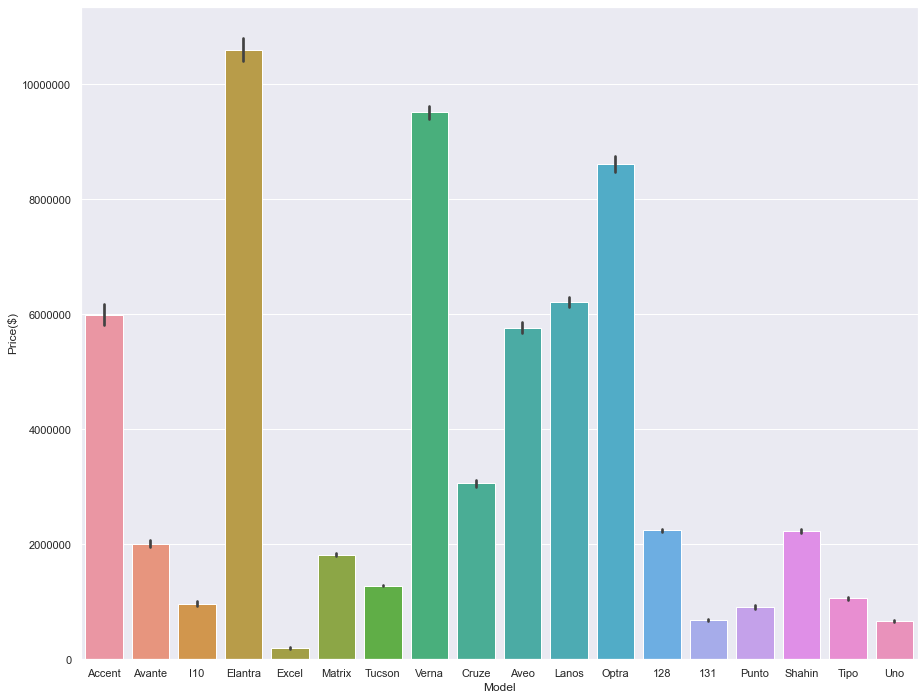

In [1006]:
sns.barplot(data=df,x='Model',y='Price($)',estimator=sum)
plt.ticklabel_format(style='plain', axis='y')

### 7-Price of Brands Car categorized by Models

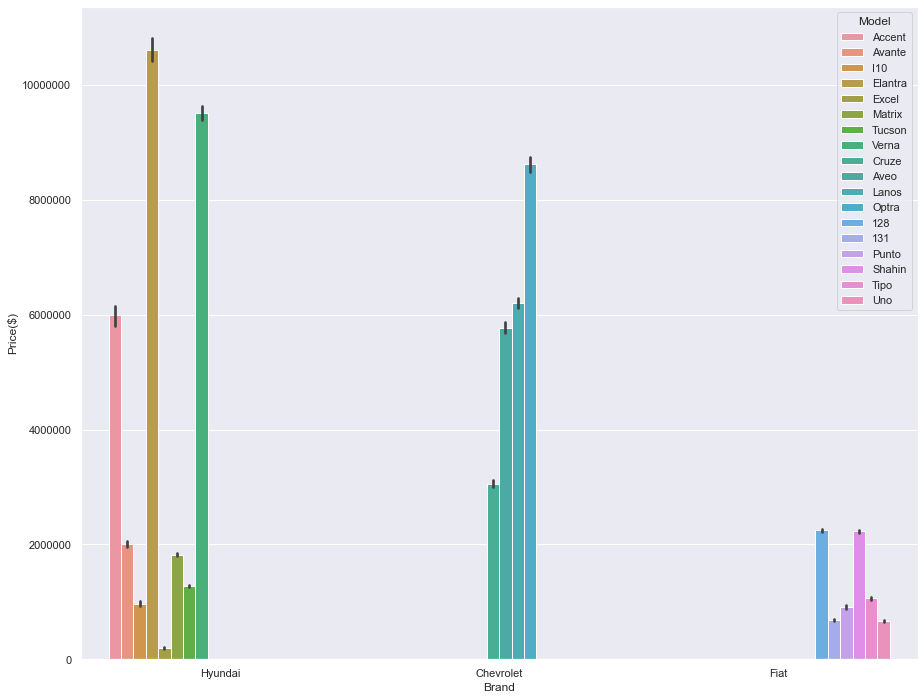

In [1007]:
sns.barplot(data=df,x='Brand',y='Price($)',hue='Model',estimator=sum)
plt.ticklabel_format(style='plain', axis='y')

### 8-The Most Used Cars Body for Each Brand ?

In [843]:
df.groupby('Body').sum().sort_values(by='Price($)',ascending=False)[['Price($)']]

,Price($)
Body,
Sedan,57974602.7
Hatchback,4554817.1
SUV,1279425.5


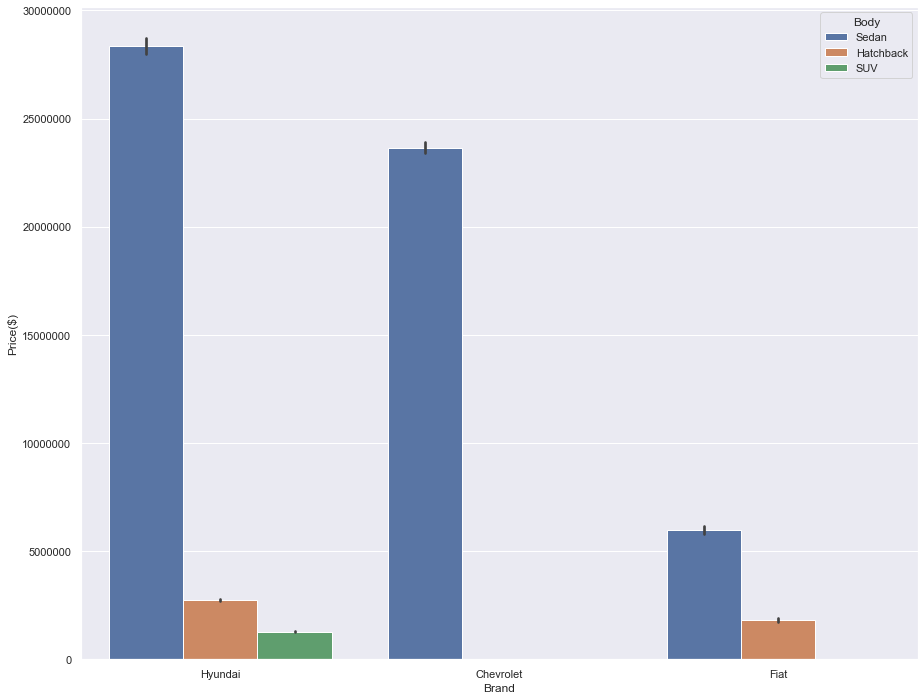

In [1008]:
sns.barplot(data=df,x='Brand',y='Price($)',hue='Body',estimator=sum)
plt.ticklabel_format(style='plain', axis='y')

### 9- the Most desirable Kilometers driven Categorized By each Brand ?

In [844]:
f.groupby('Kilometers').sum().sort_values(by='Price($)',ascending=False)[['Price($)']]

,Price($)
Kilometers,
15000.0,4546116.9
200000.0,4525498.0
110000.0,3861523.5
150000.0,3837493.4
130000.0,3763164.5
5000.0,3107394.1
190000.0,2981331.4
170000.0,2851181.0
95000.0,2706139.4


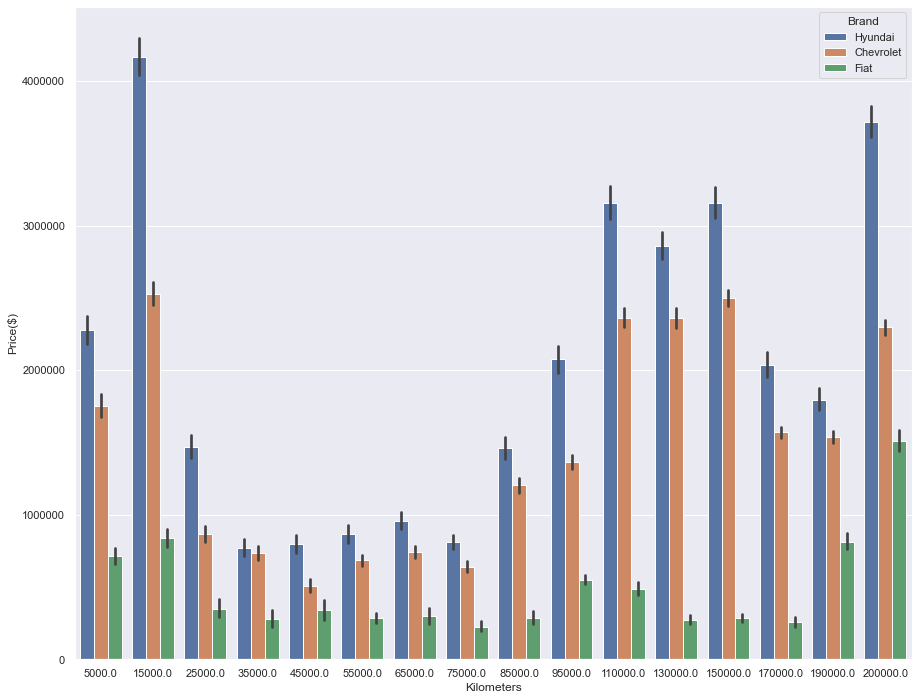

In [1010]:
sns.barplot(data=df,x='Kilometers',y='Price($)',hue='Brand',estimator=sum)
plt.ticklabel_format(style='plain', axis='y')

### 10- The Most Priced cars with Engine Size Categorized By Brands ?

In [850]:
df.groupby('Engine').sum().sort_values(by='Price($)',ascending=False)[['Price($)']]

,Price($)
Engine,
1600,39022303.5
1500,18819196.8
1300,5967345.0


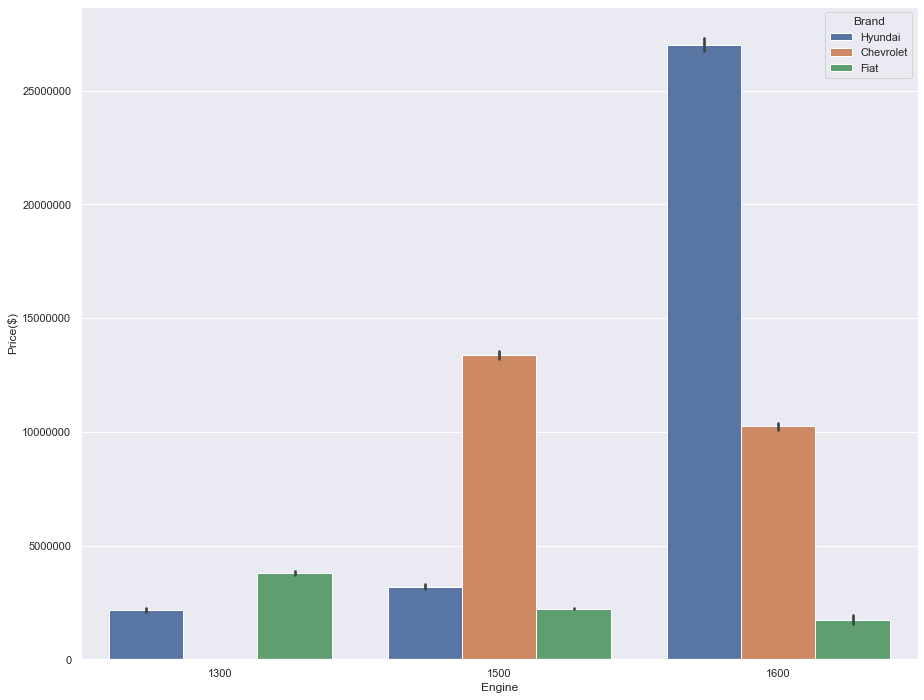

In [1009]:
sns.barplot(data=df,x='Engine',y='Price($)',hue='Brand',estimator=sum)
plt.ticklabel_format(style='plain', axis='y')

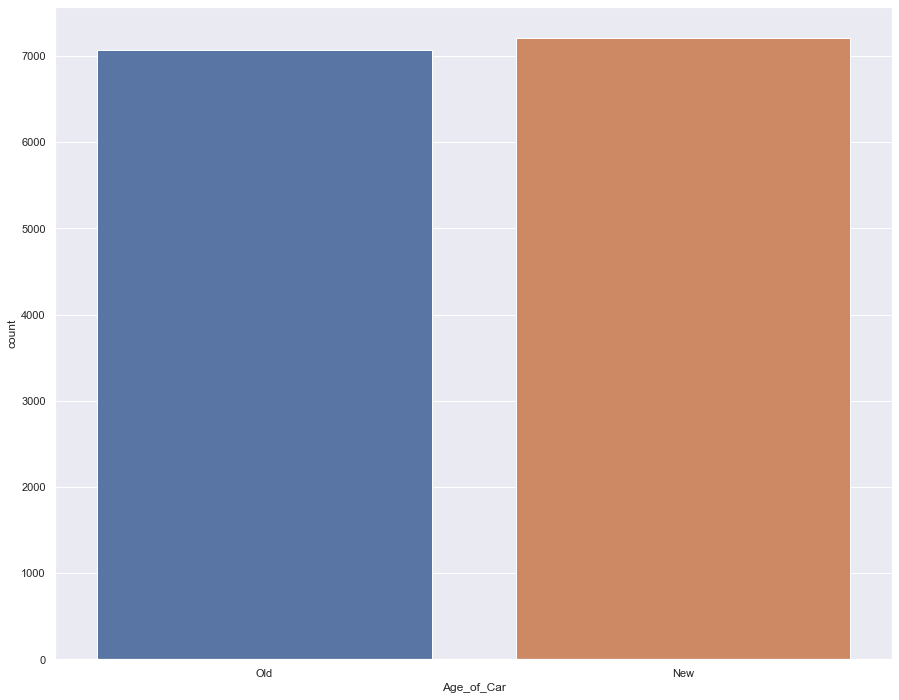

In [1337]:
sns.countplot(data=df, x='Age_of_Car')
plt.ticklabel_format(style='plain', axis='y')

# Data Pre-processing Techniques

- Fuel and Transmission (Converted to Numarical and Mapped)
- body Cotegorical Convertion (Get Dummies)
- Gov , Brand , Model , Color (Deleted)
- Train_test Split of data
- Data Normalization using Power Tranformation

## Fuel and Transmission Mapping

In [1425]:
  #Label encoding Using Map for Each Categorical Value

Transmission_map = {                             
    'Manual':0,
    'Automatic':1
}

Fuel_map = {
    'Benzine':0,
    'Natural Gas':1
}

Age_map = {
    'Old':0,
    'New':1
}

In [1426]:
Brand_map = {  
    'Hyundai':0,                        
    'Fiat':1,
    'Chevrolet':2
}

Body_map = {                              
    'Sedan':0,
    'Hatchback':1,
    'SUV':2
}

Color_map = {                             
    'Beige':0,
    'Black':1,
    'Blue- Navy Blue':2,
    'Brown':3,
    'Burgundy':4,
    'Gold':5,
    'Gray':6,
    'Green':7,
    'Orange':8,
    'Red':9,
    'Silver':10,
    'White':11,
    'Yellow':12,
    'Other Color':13
}



In [1427]:
df['Transmission'] = df['Transmission'].map(Transmission_map)

df['Fuel'] = df['Fuel'].map(Fuel_map)

df['Age_of_Car'] = df['Age_of_Car'].map(Age_map)

df['Brand'] = df['Brand'].map(Brand_map)

df['Body'] = df['Body'].map(Body_map)

df['Color'] = df['Color'].map(Color_map)

df

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Gov,Price($),Age_of_Car
0,0,Accent,0,1,2007,0,150000,1600,1,Giza,5740.0,0
1,0,Accent,0,10,2005,0,190000,1300,0,Qena,3198.0,0
2,0,Accent,0,6,1999,0,150000,1500,0,Giza,2870.0,0
3,0,Accent,0,2,2009,0,150000,1600,1,Cairo,6150.0,0
4,0,Accent,0,10,2000,0,15000,1300,0,Giza,3075.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14736,1,Uno,1,4,1997,0,170000,1300,0,Cairo,1886.0,0
14737,1,Uno,1,10,1996,0,25000,1300,0,Alexandria,1886.0,0
14738,1,Uno,1,4,1993,0,15000,1300,0,Giza,1791.7,0
14739,1,Uno,1,10,1996,0,15000,1300,0,Cairo,2829.0,0


## Removing (Gov , Model) 

In [1428]:
df.drop(columns=['Model','Gov'],axis=1,inplace=True)
df

,Brand,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price($),Age_of_Car
0,0,0,1,2007,0,150000,1600,1,5740.0,0
1,0,0,10,2005,0,190000,1300,0,3198.0,0
2,0,0,6,1999,0,150000,1500,0,2870.0,0
3,0,0,2,2009,0,150000,1600,1,6150.0,0
4,0,0,10,2000,0,15000,1300,0,3075.0,0
...,...,...,...,...,...,...,...,...,...,...
14736,1,1,4,1997,0,170000,1300,0,1886.0,0
14737,1,1,10,1996,0,25000,1300,0,1886.0,0
14738,1,1,4,1993,0,15000,1300,0,1791.7,0
14739,1,1,10,1996,0,15000,1300,0,2829.0,0


## Train_Test Split 

In [1429]:
x = df.drop('Price($)', axis=1)                   #Put All Features in x Variable (Excluding the Target)
y = df['Price($)']                                #Put the Target in Y Variable

In [1430]:
from sklearn.model_selection import train_test_split              #Split the Data into Train and Test with No rendom Choice of Data each time

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Data Normalization (Scaling)

In [1431]:
from sklearn.preprocessing import PowerTransformer             # Normalize the Values So no Feature effect the other

Scalar = PowerTransformer()

Scalar.fit_transform(x_train)

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


array([[-1.17249739, -0.31378582,  0.73504177, ...,  0.99799014,
         1.4754995 , -1.01372632],
       [ 0.29454668, -0.31378582, -1.5237659 , ..., -0.22984352,
        -0.67773659, -1.01372632],
       [-1.17249739, -0.31378582, -0.7201246 , ...,  0.99799014,
        -0.67773659, -1.01372632],
       ...,
       [ 0.29454668, -0.31378582, -0.21950735, ..., -1.46589984,
        -0.67773659, -1.01372632],
       [ 0.29454668, -0.31378582, -0.46732197, ...,  0.99799014,
        -0.67773659, -1.01372632],
       [-1.17249739, -0.31378582,  0.96657168, ...,  0.99799014,
        -0.67773659, -1.01372632]])

In [1432]:
from sklearn.preprocessing import PowerTransformer                     # Normalize the Values So no Feature effect the other
   
Scalar = PowerTransformer()

Scalar.fit_transform(x_test)

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


array([[-1.20302980e+00, -2.97903624e-01, -7.49204774e-01, ...,
         9.93405247e-01,  1.51038075e+00,  1.00280505e+00],
       [ 2.43003948e-01, -2.97903624e-01,  9.65308476e-01, ...,
        -1.46237507e+00, -6.62084711e-01, -9.97202792e-01],
       [ 2.43003948e-01, -2.97903624e-01,  9.65308476e-01, ...,
        -1.46237507e+00, -6.62084711e-01, -9.97202792e-01],
       ...,
       [ 1.25051097e+00, -2.97903624e-01,  7.26791572e-01, ...,
        -2.30192367e-01, -6.62084711e-01,  1.00280505e+00],
       [ 2.43003948e-01, -2.97903624e-01,  6.31290752e-05, ...,
        -1.46237507e+00, -6.62084711e-01, -9.97202792e-01],
       [-1.20302980e+00, -2.97903624e-01, -2.46696073e-01, ...,
         9.93405247e-01, -6.62084711e-01,  1.00280505e+00]])

# ML Models

## Linear Regression

In [1433]:
from sklearn.linear_model import LinearRegression

Lin_Reg = LinearRegression()
Lin_Reg.fit(x_train, y_train)

LinearRegression()

In [1434]:
pred = Lin_Reg.predict(x_test)

In [1435]:
pred

array([8474.35334902, 1385.66542075, 2334.4815303 , ..., 5188.03154772,
        196.17466121, 5653.57307338])

In [1295]:
Lin_Reg.coef_

array([ 9.74436272e+01, -6.71523812e+02, -5.25233393e-04,  1.94026537e+00,
        2.36126997e+03,  1.25306197e+03,  7.42294074e+02, -1.08104541e+03,
        3.38751332e+02, -2.85161211e+02, -2.43881406e+01,  3.09549352e+02,
       -9.12656873e+01, -4.17658759e+01,  1.37147868e+03, -2.27646060e+02,
        5.69263499e+01, -3.46549235e+01, -1.39771296e+02,  6.04705191e+02,
       -3.91384995e+01,  1.00067072e+02, -1.97013165e+01, -4.51416049e+02,
        4.48596890e+02])

In [1436]:
from sklearn.metrics import r2_score

print(f"R2 Score: {r2_score(y_test, pred)}")

R2 Score: 0.822192367064595


## PCA 

In [1165]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

principalComponents = pca.fit_transform(x_train)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principalcomponent'])

In [1166]:
principalDf

,principalcomponent
0,95368.379653
1,55368.345982
2,-89631.608017
3,105368.343199
4,65368.272742
...,...
10705,95368.378691
10706,95368.270979
10707,-19631.722342
10708,15368.383968


## Desicion Tree

In [1437]:
from sklearn.tree import DecisionTreeRegressor

Tree = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=20)

Tree.fit(x_train, y_train)

r2_train = Tree.score(x_train, y_train)
r2_test = Tree.score(x_test, y_test)

print(f"R2 Score of Decision Tree Training: {r2_train}")
print(f"R2 Score of Decision Tree Test: {r2_test}")

R2 Score of Decision Tree Training: 0.8565596715130026
R2 Score of Decision Tree Test: 0.8668397355518047


## Random Forest 

In [1438]:
from sklearn.model_selection import GridSearchCV

Desicion_Tree = DecisionTreeRegressor()
parameters = {
    'max_depth': [5, 10, 15, 20],
    'max_leaf_nodes': [10, 15, 20, 25]
}

grid = GridSearchCV(Desicion_Tree, parameters)

In [1439]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_leaf_nodes': [10, 15, 20, 25]})

In [1440]:
r2_train = grid.score(x_train, y_train)
r2_test = grid.score(x_test, y_test)

print(f"R2 Score of Decision Tree Training: {r2_train}")
print(f"R2 Score of Decision Tree Test: {r2_test}")

R2 Score of Decision Tree Training: 0.864702830977818
R2 Score of Decision Tree Test: 0.8739176639467134


In [1301]:
grid.best_params_

{'max_depth': 10, 'max_leaf_nodes': 25}

## XGBoost

In [1441]:
from xgboost import XGBRegressor

XGB = XGBRegressor(n_estimators=8, max_depth=7, max_leaves=20)

XGB.fit(x_train, y_train)

r2_train = XGB.score(x_train, y_train)
r2_test = XGB.score(x_test, y_test)

print(f"R2 Score of XGBoost Training: {r2_train}")
print(f"R2 Score of XGBoost Test: {r2_test}")

R2 Score of XGBoost Training: 0.8898063318687567
R2 Score of XGBoost Test: 0.8902585482487376


In [1442]:
from xgboost import XGBRegressor

XGB = XGBRegressor(n_estimators=12, max_depth=8, max_leaves=30)

XGB.fit(x_train, y_train)

r2_train = XGB.score(x_train, y_train)
r2_test = XGB.score(x_test, y_test)

print(f"R2 Score of XGBoost Training: {r2_train}")
print(f"R2 Score of XGBoost Test: {r2_test}")

R2 Score of XGBoost Training: 0.9157836716791169
R2 Score of XGBoost Test: 0.9030313844713603


## Model Tuning

Tuning the model is about modifying the hyperparameters of the model in order to get best accuracy.

in our Project : 

-in the first trail : we modify on the 3 hyperparameters (No. of estimators=8, max_depth=7, max_leaves=20) , the accuracy for the test was 0.892

-in the Second trail : we modify on the 3 hyperparameters (No. of estimators=12, max_depth=8, max_leaves=30) , the accuracy for the test was 0.905

Do When HyperParameter increase the Accuracy of the Model Increase

also we have to keep the hyperparameters balanced as one hyperparameter can effect the other one. 

- When n_estimator and Max_Leaf Increased the model accuracy Showed to be Increasing  
- When Max_depth decreased to somehow the model accuracy Showd to be Increasing too 

Note: the Different between n_estimator and Max_ Depth must not Exceed 5.

Cross-validation is a technique for evaluating a machine learning model and testing its performance. CV is commonly used in applied ML tasks. It helps to compare and select an appropriate model for the specific predictive modeling problem.

in Our Project :
We Used R2 Score as a Cross Validation 

R2= 1- SSres / SStot
Where,
SSres is the sum of squares of the residual errors.
SStot is the total sum of the errors.



# Deploy Model

In [1445]:
!pip install joblib

In [1447]:
import joblib

joblib.dump(XGB, 'Final_Model.h5')

['Final_Model.h5']